In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/InClassAssignment3/data.csv")
validation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/InClassAssignment3/Validate.csv")
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Encoding the Diagnosis Data

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cancer['diagnosis'] = LE.fit_transform(cancer['diagnosis'])

## Splitting the Data

In [30]:
X = cancer.drop('diagnosis', axis = 1)
y = cancer.diagnosis

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Build ANN Model

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
n_features = X_train.shape[1]

In [35]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (n_features, )))

In [36]:
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compile the Model

In [37]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 150,
                    validation_data = (X_test, y_test),
                    batch_size = 32, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)

Test Accuracy: 0.988


## Plot Accuracy and Loss

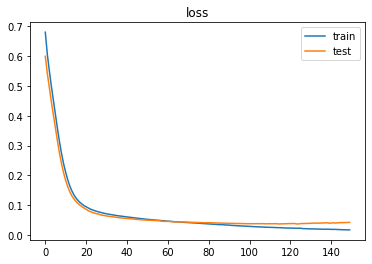

In [38]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

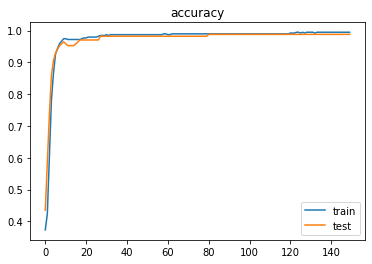

In [39]:
plt.title('accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [41]:
val_x = validation.drop('diagnosis', axis = 1)
val_y = validation['diagnosis']

In [42]:
label_encoder2 = LabelEncoder()
val_y = label_encoder2.fit_transform(val_y)

## Confusion Matrix and Classification Report

In [48]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

6/6 [==============================] - 0s 2ms/step


In [49]:
print(cm)

[[100   0]
 [  2  68]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.97      0.99        70

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170



## Validation

In [51]:
valid_list = validation.values.tolist()
print(valid_list)

[['M', 14.68, 20.13, 94.74, 684.5, 0.09867, 0.072, 0.07395, 0.05259, 0.1586, 0.05922, 0.4727, 1.24, 3.195, 45.4, 0.005718, 0.01162, 0.01998, 0.01109, 0.0141, 0.002085, 19.07, 30.88, 123.4, 1138.0, 0.1464, 0.1871, 0.2914, 0.1609, 0.3029, 0.08216], ['M', 16.13, 20.68, 108.1, 798.8, 0.117, 0.2022, 0.1722, 0.1028, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315.0, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142], ['M', 19.81, 22.15, 130.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398.0, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615], ['B', 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259], ['B', 13.08, 15

In [53]:
for i in range(0,5):
  data = valid_list[i][1:]
  if model.predict(sc.transform([data]))>0.5:
    print("The result class is Benign")    
  else:
    print("The result class is Malignant")

1/1 [==============================] - 0s 18ms/step
The result class is Benign
1/1 [==============================] - 0s 17ms/step
The result class is Benign
1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


The result class is Benign
1/1 [==============================] - 0s 21ms/step
The result class is Malignant
1/1 [==============================] - 0s 21ms/step
The result class is Malignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
